# Exploratory Data Analysis


#### Goal

    1.Investigate top-paying roles and skills in the data science industry.
    2.Use Python to explore a real-live dataset on job postings.
    3.For job-seekers: use these insights to help find the best job opportunities.

#### Final Deliverables:

    1.Create Jupyter Notebookss (showcasing core skills in Python).
    2.Create a summary page (via README.md) capturing your findings.
    3.Share this project via GitHub & LinkedIn.

#### Questions to Answer

    1.What are the most demanded skills for the top 3 most popular data roles?
    2.How are in-demand skills trending for Data Analysts?
    3.How well do jobs and skills pay for Data Analysts?
    4.What is the most optimal skill to learn for Data Analysts? (High Demand AND High Paying)


In [2]:
#importing essential Modules and Libarires
import ast
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset
import seaborn as sns


#loading Data

df=load_dataset('lukebarousse/data_jobs')['train'].to_pandas()


### Basic Data Info and Cleaning

In [13]:
df.info()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

### Data Roles to Analyze

Text(0.5, 1.0, 'Number of Jobs per Job Title')

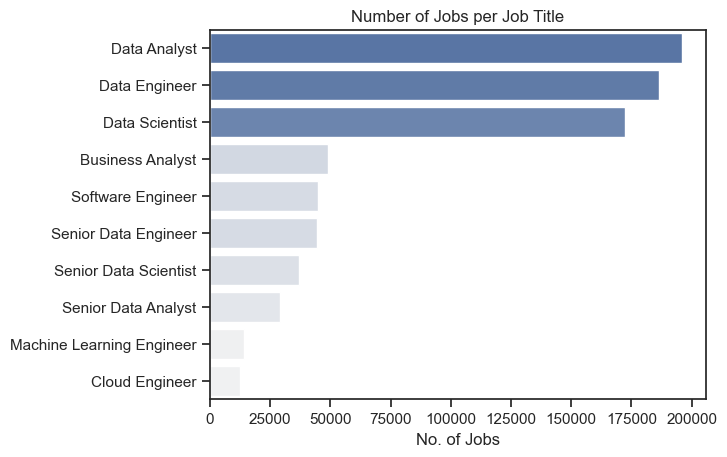

In [28]:
#Data Roles
df_plot1=df['job_title_short'].value_counts().to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot1,x='count',y='job_title_short',hue='count',palette='light:b',legend=False)
plt.xlabel("No. of Jobs")
plt.ylabel("")
plt.title("Number of Jobs per Job Title")



### Countries to Analyze

Text(0.5, 1.0, 'Number of Jobs per Country')

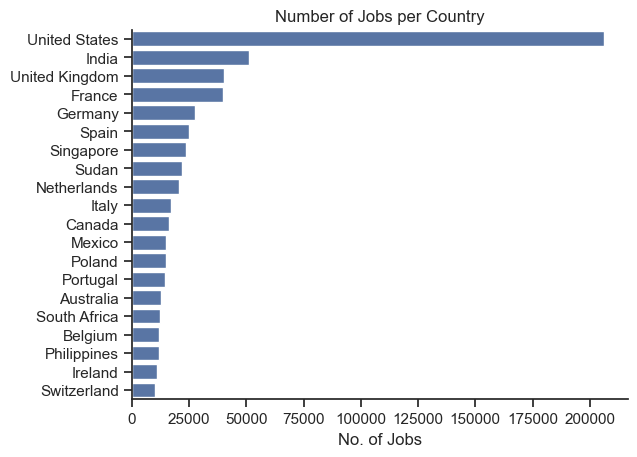

In [56]:
#Countries
df_plot2=df["job_country"].value_counts().to_frame().head(20)

sns.barplot(data=df_plot2,x='count',y='job_country' ,legend=False)
sns.despine()
plt.xlabel("No. of Jobs")
plt.ylabel("")
plt.title("Number of Jobs per Country")


### Select Country and Job Title by Variable

Text(0.5, 1.0, 'Number of Data Analyst Jobs in India by location')

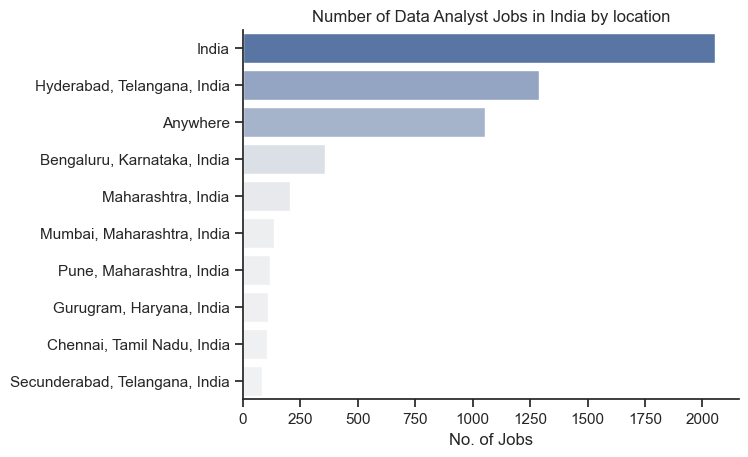

In [77]:
selected_country = 'India'
selected_title = 'Data Analyst'



df_sel=df[(df['job_title_short']==selected_title) & (df['job_country']==selected_country)]
df_plot1=df_sel['job_location'].value_counts().head(10).to_frame()

sns.barplot(data=df_plot1,x='count',y='job_location',hue='count',palette='light:b',legend=False)
sns.despine()
plt.xlabel("No. of Jobs")
plt.ylabel("")
plt.title(f"Number of {selected_title} Jobs in {selected_country} by location")


### Companies for Selected Data

Text(0.5, 1.0, 'Number of Jobs for Data Analyst in Top Companies Across India')

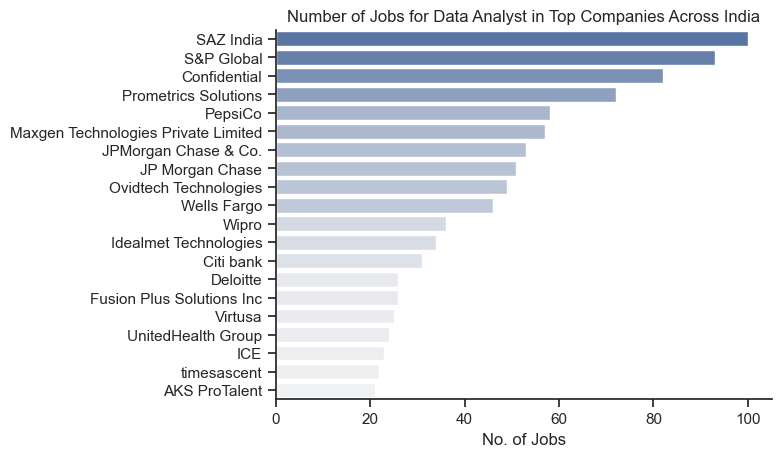

In [67]:

df_plot1=df_sel['company_name'].value_counts().head(20).to_frame()

sns.barplot(data=df_plot1,x='count',y='company_name',hue='count',palette='light:b',legend=False)
sns.despine()
plt.xlabel("No. of Jobs")
plt.ylabel("")
plt.title(f"Number of Jobs for {selected_title} in Top Companies Across {selected_country}")

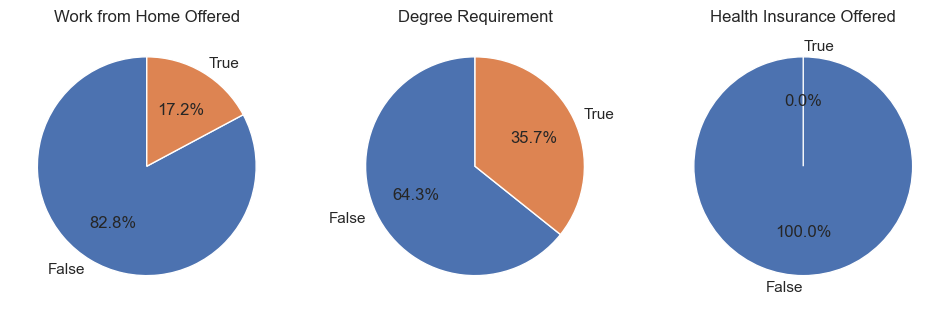

In [83]:
fig,ax =plt.subplots(1,3) 
fig.set_size_inches((12, 5))

dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

for i, (column, title) in enumerate(dict_column.items()):
    value_count = df_sel[column].value_counts().reindex([False, True], fill_value=0)
    ax[i].pie(value_count,labels=["False","True"],autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)